In [1]:
%load_ext watermark
%watermark -a "Alessandro Parisi" -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn
# to install watermark launch 'pip install watermark' at command line
import warnings 
warnings.simplefilter('ignore')

Alessandro Parisi 
last updated: 2025-10-18 

CPython 3.5.4
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3
matplotlib 2.0.2
sklearn 0.20.0
seaborn 0.8


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('../datasets/network-logs.csv')

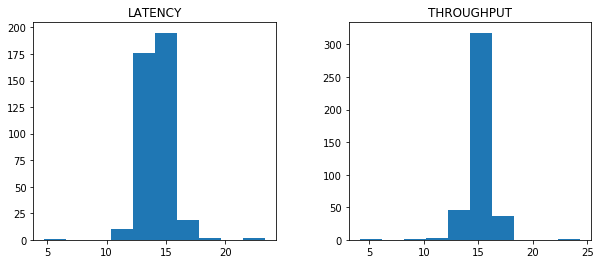

In [3]:
hist_dist = dataset[['LATENCY', 'THROUGHPUT']].hist(grid=False, figsize=(10,4))

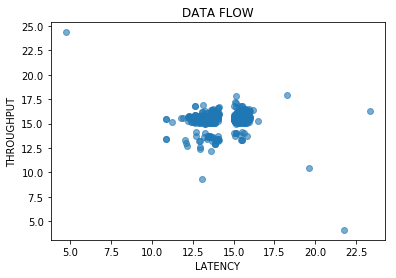

In [4]:
data = dataset[['LATENCY', 'THROUGHPUT']].values

plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
plt.show()

In [5]:
"""
Anomaly Detection Module
Thanks to Oleksii Trekhleb:
https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/anomaly_detection/gaussian_anomaly_detection.py
"""
from gaussian_anomaly_detection import GaussianAnomalyDetection

gaussian_anomaly_detection = GaussianAnomalyDetection(data)

print('mu param estimation: ')
print(gaussian_anomaly_detection.mu_param)

print('\n')

print('sigma squared estimation: ')
print(gaussian_anomaly_detection.sigma_squared)

mu param estimation: 
[ 14.42070163  15.39209133]


sigma squared estimation: 
[ 2.09674794  1.37224807]


In [6]:
targets = dataset['ANOMALY'].values.reshape((data.shape[0], 1))
probs = gaussian_anomaly_detection.multivariate_gaussian(data)

(threshold, F1, precision_, recall_, f1_) = gaussian_anomaly_detection.select_threshold(targets, probs)

print('\n')

print('threshold estimation: ')
print(threshold)



threshold estimation: 
0.00027176836729


[]

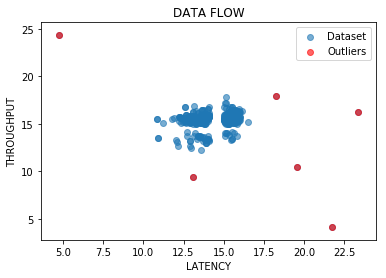

In [7]:
outliers = np.where(probs < threshold)[0]

# Plot original data.
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')

# Plot the outliers.
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers')

# Display plots.
plt.legend()
plt.plot()

In [8]:
print('F1 score: ')
print(F1)

F1 score: 
0.666666666667


In [9]:
from sklearn.metrics import roc_curve

FPR, TPR, OPC = roc_curve(targets, probs)

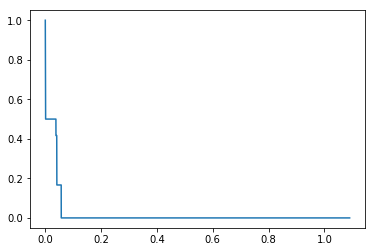

In [10]:
# Plotting Sensitivity
plt.plot(OPC,TPR)

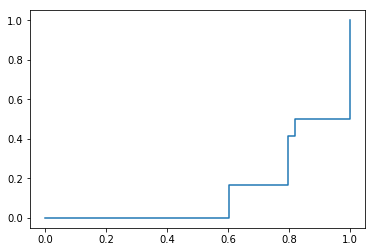

In [11]:
# Plotting ROC curve
plt.plot(FPR,TPR)